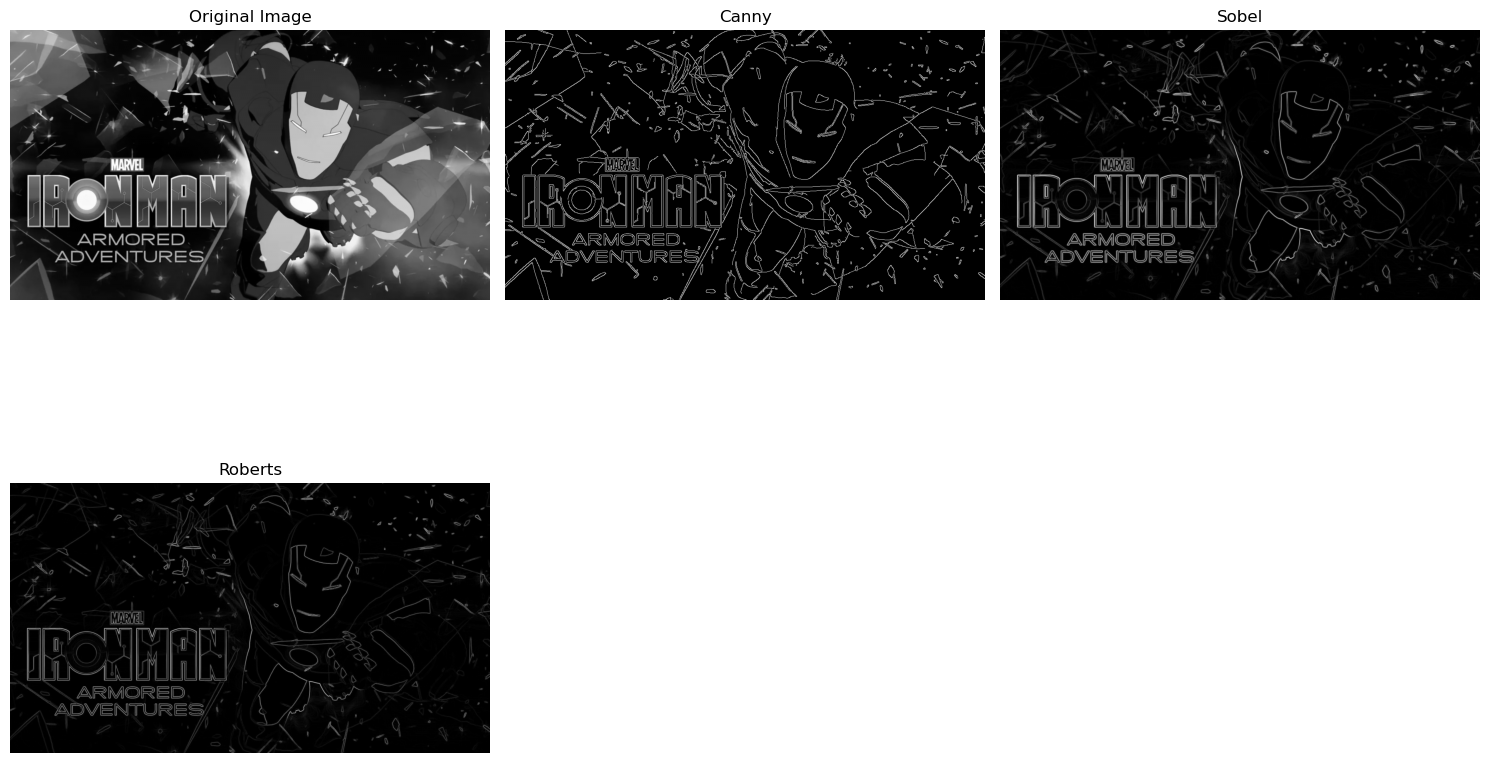

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def edge_detection(image_path, low_threshold=50, high_threshold=150):
   
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print("Error: Image not found.")
        return
    
  
    canny_edges = cv2.Canny(img, low_threshold, high_threshold)
    
   
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)
    sobel_edges = (sobel_edges / sobel_edges.max()) * 255
    sobel_edges = np.uint8(sobel_edges)
 
    roberts_cross_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    roberts_cross_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
    roberts_x = ndimage.convolve(img.astype(np.float32), roberts_cross_x)
    roberts_y = ndimage.convolve(img.astype(np.float32), roberts_cross_y)
    roberts_edges = np.sqrt(roberts_x**2 + roberts_y**2)
    roberts_edges = (roberts_edges / roberts_edges.max()) * 255
    roberts_edges = np.uint8(roberts_edges)
    
    # Prewitt edge detection (with proper normalization)
   # prewitt_x = ndimage.prewitt(img, axis=0)
    #prewitt_y = ndimage.prewitt(img, axis=1)
    #prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)
    #prewitt_edges = (prewitt_edges / prewitt_edges.max()) * 255
    #prewitt_edges = np.uint8(prewitt_edges)

  
    titles = ['Original Image', 'Canny', 'Sobel', 'Roberts']
    images = [img, canny_edges, sobel_edges, roberts_edges]

    plt.figure(figsize=(15, 10))
    for i in range(4):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


edge_detection(r"D:\scale.webp")


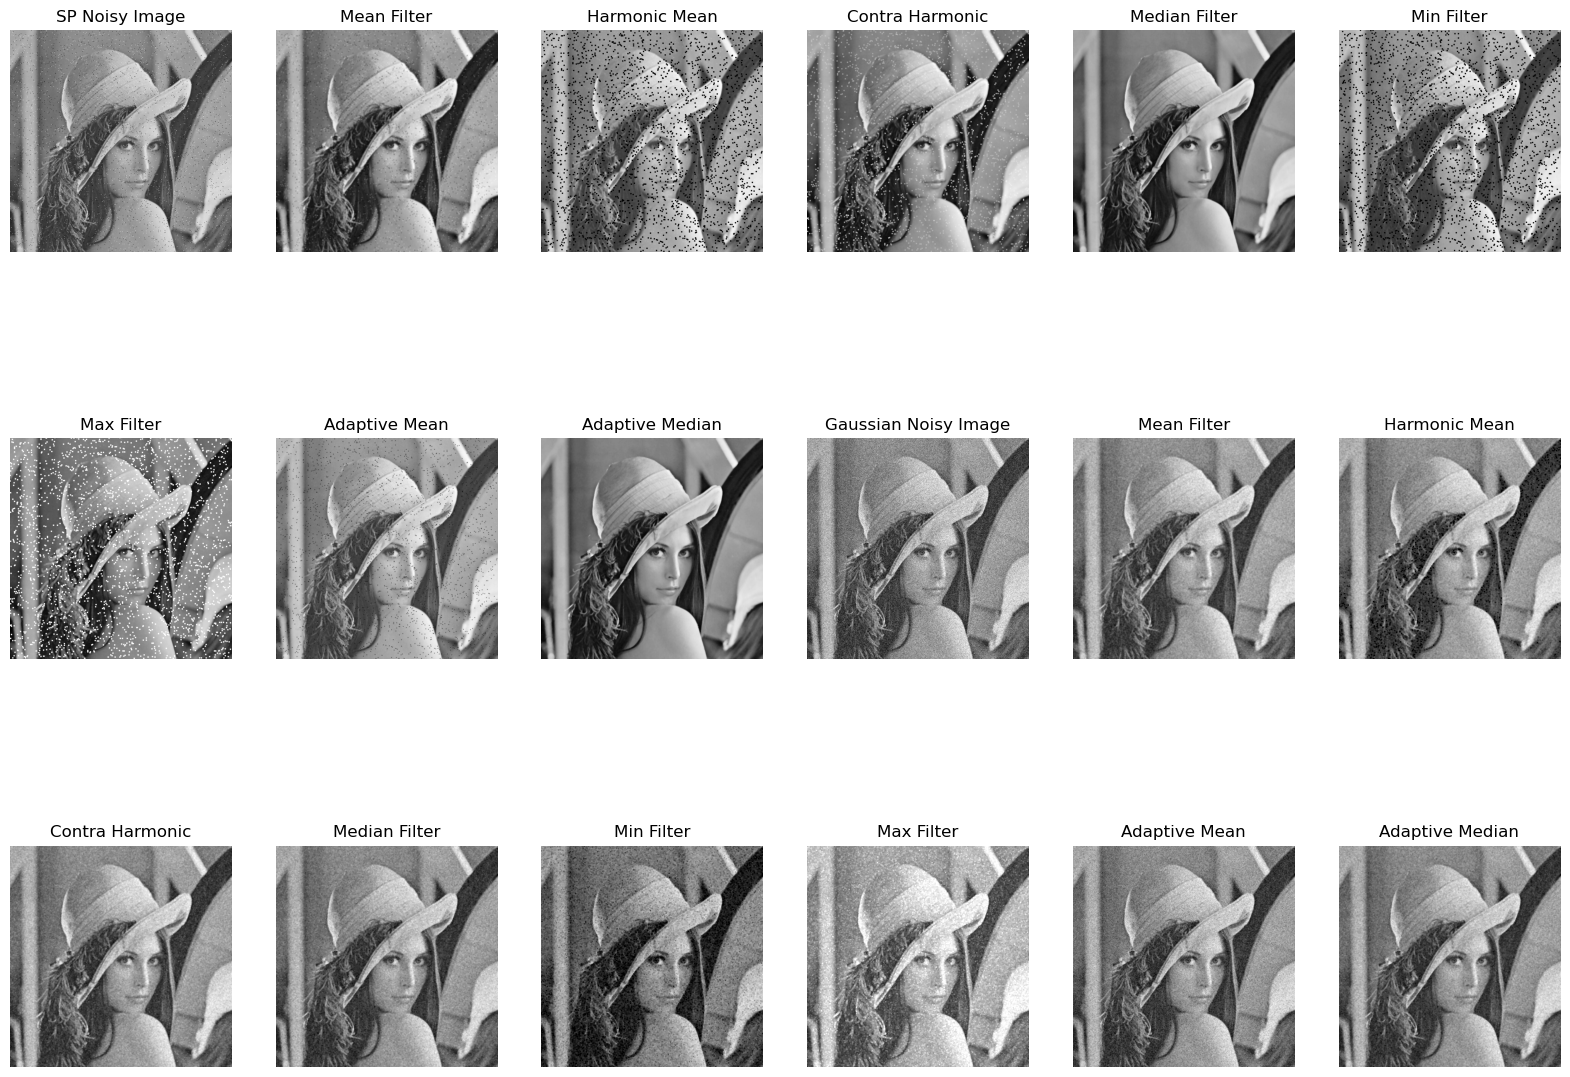

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter

def add_salt_pepper_noise(image, prob):
    """Add salt and pepper noise to an image."""
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = int(prob * total_pixels / 2)
    
    # Add salt
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255
    
    # Add pepper
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy_image

def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

def mean_filter(image, kernel_size=3):
    """Applies a mean filter to the image."""
    return cv2.blur(image, (kernel_size, kernel_size))

def harmonic_mean_filter(image, kernel_size=3):
    """Applies a harmonic mean filter to the image."""
    epsilon=1e-6
    return kernel_size ** 2 / (generic_filter(1.0 / (image + epsilon), np.sum, size=kernel_size) + epsilon)

def contra_harmonic_filter(image, kernel_size=3, Q=1.5):
    """Applies a contra-harmonic mean filter to the image."""
    num = generic_filter(image ** (Q + 1), np.sum, size=kernel_size)
    denom = generic_filter(image ** Q, np.sum, size=kernel_size)
    return np.where(denom == 0, image, num / (denom + 1e-6))

def median_filter(image, kernel_size=3):
    """Applies a median filter to the image."""
    return cv2.medianBlur(image, kernel_size)

def min_filter(image, kernel_size=3):
    """Applies a min filter to the image."""
    return generic_filter(image, np.min, size=kernel_size)

def max_filter(image, kernel_size=3):
    """Applies a max filter to the image."""
    return generic_filter(image, np.max, size=kernel_size)

def adaptive_mean_filter(image, kernel_size=3):
    """Adaptive mean filter where mean changes dynamically."""
    local_mean = cv2.blur(image, (kernel_size, kernel_size))
    return np.where(image < local_mean, image, local_mean)

def adaptive_median_filter(image, kernel_size=3):
    """Adaptive median filter that adjusts to local noise conditions."""
    return median_filter(image, kernel_size)


# Load the image
image = cv2.imread(r"D:\Lenna_(test_image).png", cv2.IMREAD_GRAYSCALE)
    
# Add noises
noisy_image_sp = add_salt_pepper_noise(image, 0.02)
noisy_image_gauss = add_gaussian_noise(image, mean=0, sigma=25)
    
# Apply filters for Salt and Pepper Noise
mean_filtered_sp = mean_filter(noisy_image_sp)
harmonic_filtered_sp = harmonic_mean_filter(noisy_image_sp)
contra_harmonic_filtered_sp = contra_harmonic_filter(noisy_image_sp)
median_filtered_sp = median_filter(noisy_image_sp)
min_filtered_sp = min_filter(noisy_image_sp)
max_filtered_sp = max_filter(noisy_image_sp)
adaptive_mean_filtered_sp = adaptive_mean_filter(noisy_image_sp)
adaptive_median_filtered_sp = adaptive_median_filter(noisy_image_sp)

# Apply filters for Gaussian Noise
mean_filtered_gauss = mean_filter(noisy_image_gauss)
harmonic_filtered_gauss = harmonic_mean_filter(noisy_image_gauss)
contra_harmonic_filtered_gauss = contra_harmonic_filter(noisy_image_gauss)
median_filtered_gauss = median_filter(noisy_image_gauss)
min_filtered_gauss = min_filter(noisy_image_gauss)
max_filtered_gauss = max_filter(noisy_image_gauss)
adaptive_mean_filtered_gauss = adaptive_mean_filter(noisy_image_gauss)
adaptive_median_filtered_gauss = adaptive_median_filter(noisy_image_gauss)
    
# Display Results
filters_sp = [noisy_image_sp, mean_filtered_sp, harmonic_filtered_sp, contra_harmonic_filtered_sp,
            median_filtered_sp, min_filtered_sp, max_filtered_sp, adaptive_mean_filtered_sp, adaptive_median_filtered_sp]
titles_sp = ['SP Noisy Image', 'Mean Filter', 'Harmonic Mean', 'Contra Harmonic',
            'Median Filter', 'Min Filter', 'Max Filter', 'Adaptive Mean', 'Adaptive Median']

filters_gauss = [noisy_image_gauss, mean_filtered_gauss, harmonic_filtered_gauss, contra_harmonic_filtered_gauss,
                median_filtered_gauss, min_filtered_gauss, max_filtered_gauss, adaptive_mean_filtered_gauss, adaptive_median_filtered_gauss]
titles_gauss = ['Gaussian Noisy Image', 'Mean Filter', 'Harmonic Mean', 'Contra Harmonic',
                'Median Filter', 'Min Filter', 'Max Filter', 'Adaptive Mean', 'Adaptive Median']

plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(3, 6, i+1)
    plt.imshow(filters_sp[i], cmap='gray')
    plt.title(titles_sp[i])
    plt.axis('off')

    plt.subplot(3, 6, i+10)
    plt.imshow(filters_gauss[i], cmap='gray')
    plt.title(titles_gauss[i])
    plt.axis('off')
    
plt.show()


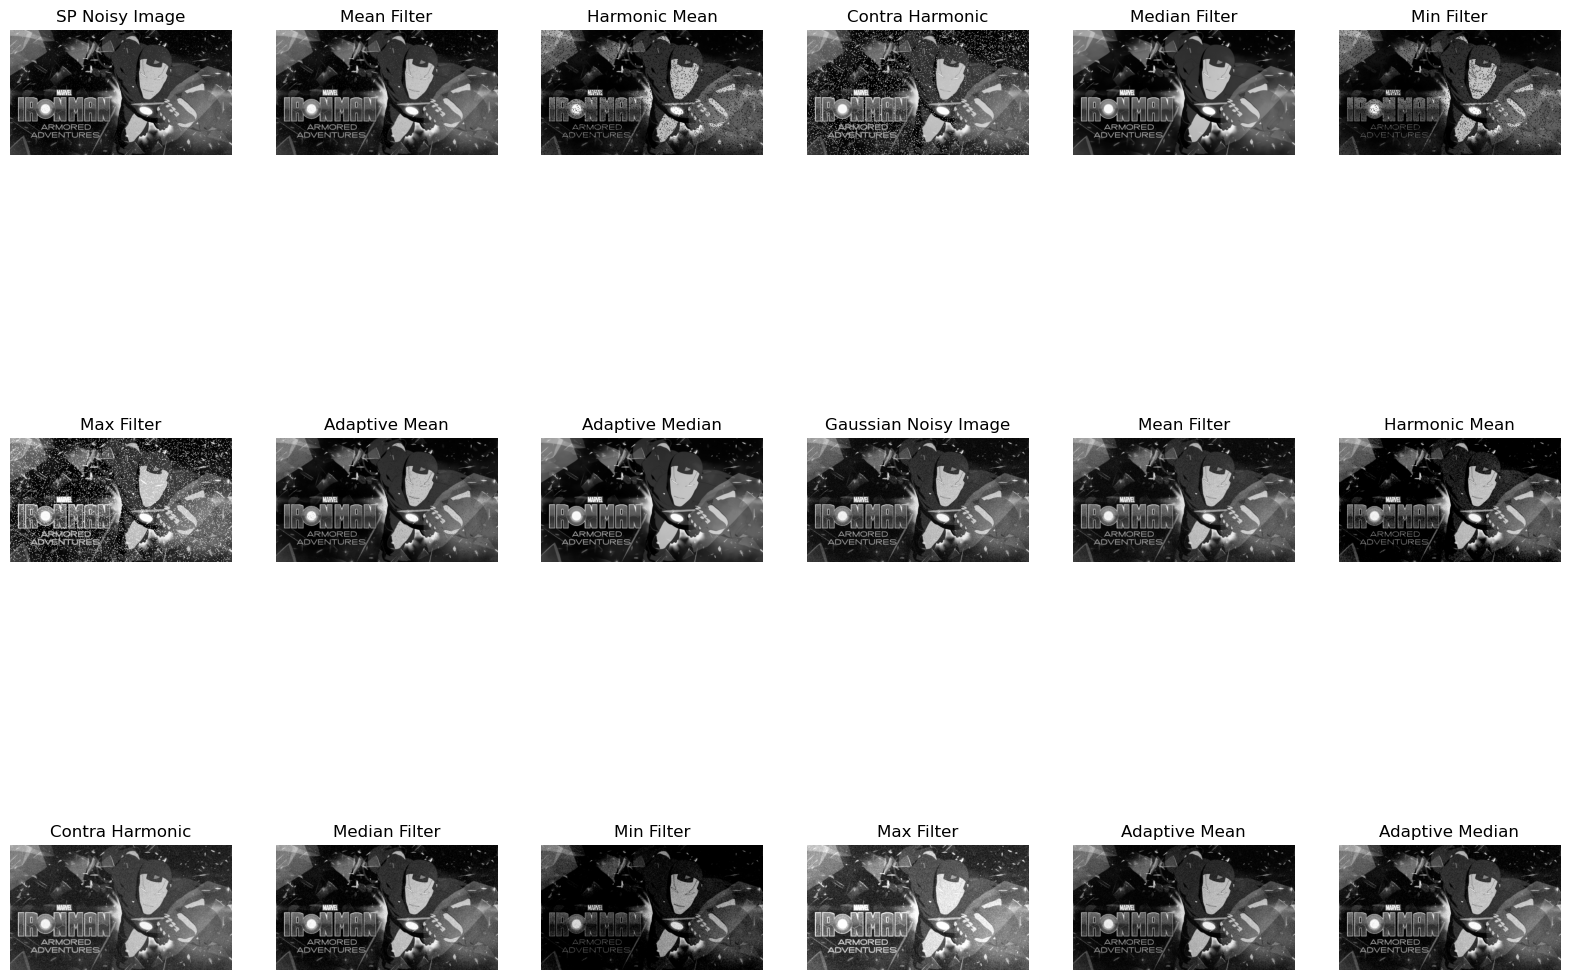

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter

def add_salt_pepper_noise(image, prob):
    """Add salt and pepper noise to an image."""
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = int(prob * total_pixels / 2)
    
    # Add salt
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255
    
    # Add pepper
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    
    return noisy_image

def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

def mean_filter(image, kernel_size=3):
    """Applies a mean filter to the image."""
    return cv2.blur(image, (kernel_size, kernel_size))

def harmonic_mean_filter(image, kernel_size=3):
    """Applies a harmonic mean filter to the image."""
    epsilon=1e-6
    return kernel_size ** 2 / (generic_filter(1.0 / (image + epsilon), np.sum, size=kernel_size) + epsilon)

def contra_harmonic_filter(image, kernel_size=3, Q=1.5):
    """Applies a contra-harmonic mean filter to the image."""
    num = generic_filter(image ** (Q + 1), np.sum, size=kernel_size)
    denom = generic_filter(image ** Q, np.sum, size=kernel_size)
    return np.where(denom == 0, image, num / (denom + 1e-6))

def median_filter(image, kernel_size=3):
    """Applies a median filter to the image."""
    return cv2.medianBlur(image, kernel_size)

def min_filter(image, kernel_size=3):
    """Applies a min filter to the image."""
    return generic_filter(image, np.min, size=kernel_size)

def max_filter(image, kernel_size=3):
    """Applies a max filter to the image."""
    return generic_filter(image, np.max, size=kernel_size)

def adaptive_mean_filter(image, kernel_size=3):
    """Adaptive mean filter where mean changes dynamically."""
    local_mean = cv2.blur(image, (kernel_size, kernel_size))
    return np.where(image < local_mean, image, local_mean)

def adaptive_median_filter(image, kernel_size=3):
    """Adaptive median filter that adjusts to local noise conditions."""
    return median_filter(image, kernel_size)


# Load the image
image = cv2.imread(r"D:\scale.webp", cv2.IMREAD_GRAYSCALE)
    
# Add noises
noisy_image_sp = add_salt_pepper_noise(image, 0.02)
noisy_image_gauss = add_gaussian_noise(image, mean=0, sigma=25)
    
# Apply filters for Salt and Pepper Noise
mean_filtered_sp = mean_filter(noisy_image_sp)
harmonic_filtered_sp = harmonic_mean_filter(noisy_image_sp)
contra_harmonic_filtered_sp = contra_harmonic_filter(noisy_image_sp)
median_filtered_sp = median_filter(noisy_image_sp)
min_filtered_sp = min_filter(noisy_image_sp)
max_filtered_sp = max_filter(noisy_image_sp)
adaptive_mean_filtered_sp = adaptive_mean_filter(noisy_image_sp)
adaptive_median_filtered_sp = adaptive_median_filter(noisy_image_sp)

# Apply filters for Gaussian Noise
mean_filtered_gauss = mean_filter(noisy_image_gauss)
harmonic_filtered_gauss = harmonic_mean_filter(noisy_image_gauss)
contra_harmonic_filtered_gauss = contra_harmonic_filter(noisy_image_gauss)
median_filtered_gauss = median_filter(noisy_image_gauss)
min_filtered_gauss = min_filter(noisy_image_gauss)
max_filtered_gauss = max_filter(noisy_image_gauss)
adaptive_mean_filtered_gauss = adaptive_mean_filter(noisy_image_gauss)
adaptive_median_filtered_gauss = adaptive_median_filter(noisy_image_gauss)
    
# Display Results
filters_sp = [noisy_image_sp, mean_filtered_sp, harmonic_filtered_sp, contra_harmonic_filtered_sp,
            median_filtered_sp, min_filtered_sp, max_filtered_sp, adaptive_mean_filtered_sp, adaptive_median_filtered_sp]
titles_sp = ['SP Noisy Image', 'Mean Filter', 'Harmonic Mean', 'Contra Harmonic',
            'Median Filter', 'Min Filter', 'Max Filter', 'Adaptive Mean', 'Adaptive Median']

filters_gauss = [noisy_image_gauss, mean_filtered_gauss, harmonic_filtered_gauss, contra_harmonic_filtered_gauss,
                median_filtered_gauss, min_filtered_gauss, max_filtered_gauss, adaptive_mean_filtered_gauss, adaptive_median_filtered_gauss]
titles_gauss = ['Gaussian Noisy Image', 'Mean Filter', 'Harmonic Mean', 'Contra Harmonic',
                'Median Filter', 'Min Filter', 'Max Filter', 'Adaptive Mean', 'Adaptive Median']

plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(3, 6, i+1)
    plt.imshow(filters_sp[i], cmap='gray')
    plt.title(titles_sp[i])
    plt.axis('off')

    plt.subplot(3, 6, i+10)
    plt.imshow(filters_gauss[i], cmap='gray')
    plt.title(titles_gauss[i])
    plt.axis('off')
    
plt.show()